In [256]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [257]:
CCE = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\FY2008\structured\emotion\CharlotteCityEmotionDataFY08.csv")
CCE.drop(['Unnamed: 0'], axis=1,inplace=True)

In [258]:
CCE20 = pd.read_csv(r"C:\unnati\datascience\project\Repo\new branch\Budget_Text_Analysis\util\data\FY2020\structured\emotion\CharlotteCityEmotionDataFY20.csv")
CCE20.drop(['Unnamed: 0'], axis=1,inplace=True)

In [259]:
CCE.head()

,page_number,word,sent_count,sentiment,category
0,5,Budget,31,Trust,Emotion
1,206,Sewer,23,Disgust,Emotion
2,208,Budget,22,Trust,Emotion
3,30,Increase,17,Positive,Sentiment
4,153,Grant,17,Anticipation,Emotion


In [260]:
CCE.describe()

,page_number,sent_count
count,8042.000000,8042.000000
mean,96.567147,1.621238
std,59.507300,1.524753
min,1.000000,1.000000
25%,46.000000,1.000000
50%,91.000000,1.000000
75%,143.000000,2.000000
max,210.000000,31.000000


In [261]:
CCE20.head()

,page_number,word,sent_count,sentiment,category
0,72,Budget,37,Trust,Emotion
1,292,Maintenance,28,Trust,Emotion
2,300,Sewer,28,Disgust,Emotion
3,276,General,25,Positive,Sentiment
4,276,General,25,Trust,Emotion


In [262]:
list08 = CCE["sentiment"].values
list08

array(['Trust', 'Disgust', 'Trust', ..., 'Trust', 'Trust', 'Trust'],
      dtype=object)

In [263]:
list20 = CCE20["sentiment"].values
list20

array(['Trust', 'Trust', 'Disgust', ..., 'Sadness', 'Trust', 'Trust'],
      dtype=object)

In [264]:
!pip install nltk

In [265]:
import nltk
import seaborn as sns

In [266]:
from nltk.probability import FreqDist
fdist = FreqDist(list08)
print(fdist)

<FreqDist with 10 samples and 8042 outcomes>


In [267]:
fdist.most_common(10)

[('Positive', 2645),
 ('Trust', 1730),
 ('Anticipation', 1034),
 ('Negative', 856),
 ('Fear', 468),
 ('Joy', 458),
 ('Sadness', 293),
 ('Anger', 273),
 ('Disgust', 147),
 ('Surprise', 138)]

In [268]:

fdist20 = FreqDist(list20)
print(fdist20)

<FreqDist with 10 samples and 17010 outcomes>


In [269]:
fdist20.most_common(10)

[('Positive', 5994),
 ('Trust', 4016),
 ('Anticipation', 2303),
 ('Negative', 1293),
 ('Joy', 1147),
 ('Fear', 837),
 ('Sadness', 528),
 ('Anger', 391),
 ('Surprise', 320),
 ('Disgust', 181)]

In [270]:

common_words = pd.merge(CCE, CCE20)

In [271]:
common_words.shape

(362, 5)

In [272]:
common_words.head()

,page_number,word,sent_count,sentiment,category
0,19,Budget,6,Trust,Emotion
1,21,Public,4,Anticipation,Emotion
2,21,Public,4,Positive,Sentiment
3,34,Tax,4,Negative,Sentiment
4,34,Tax,4,Sadness,Emotion


In [273]:
abc = CCE.groupby(['word','sentiment'],as_index=False).count().sort_values('page_number',ascending=False)

In [274]:
abc.head()

,word,sentiment,page_number,sent_count,category
135,Budget,Trust,123,123,123
974,Plan,Anticipation,93,93,93
635,General,Trust,72,72,72
634,General,Positive,72,72,72
903,Neighborhood,Anticipation,70,70,70


In [275]:
#pd.crosstab(abc.word, abc.sentiment, margins=True)

In [276]:
#table = pd.crosstab(CCE.category, CCE.sentiment, margins=True)

In [277]:
from scipy.stats import chi2_contingency
#stat, p, dof, expected = chi2_contingency(table)

In [278]:
#print(expected)

In [279]:
CCE.sentiment = CCE.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [280]:
CCE['sentiment'] = pd.to_numeric(CCE['sentiment'])
CCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 5 columns):
page_number    8042 non-null int64
word           8042 non-null object
sent_count     8042 non-null int64
sentiment      8042 non-null int64
category       8042 non-null object
dtypes: int64(3), object(2)
memory usage: 314.2+ KB


In [281]:
CCE20.sentiment = CCE20.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [282]:
CCE20['sentiment'] = pd.to_numeric(CCE20['sentiment'])
CCE20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 5 columns):
page_number    17010 non-null int64
word           17010 non-null object
sent_count     17010 non-null int64
sentiment      17010 non-null int64
category       17010 non-null object
dtypes: int64(3), object(2)
memory usage: 664.5+ KB


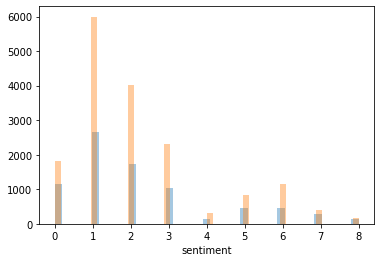

In [283]:
#calculate and plot distributions
sns.distplot(CCE.sentiment, kde=False)
sns.distplot(CCE20.sentiment, kde=False)
plt.show()

In [284]:
CCE_ = CCE.loc[:2500]
CCE_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
page_number    2501 non-null int64
word           2501 non-null object
sent_count     2501 non-null int64
sentiment      2501 non-null int64
category       2501 non-null object
dtypes: int64(3), object(2)
memory usage: 97.8+ KB


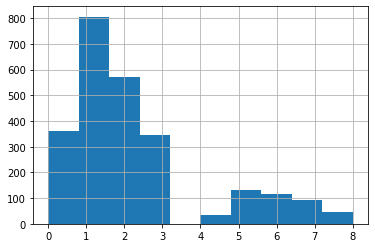

In [285]:
CCE_['sentiment'].hist()

In [286]:
CCE20_ = CCE20.loc[:2500]
CCE20_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
page_number    2501 non-null int64
word           2501 non-null object
sent_count     2501 non-null int64
sentiment      2501 non-null int64
category       2501 non-null object
dtypes: int64(3), object(2)
memory usage: 97.8+ KB


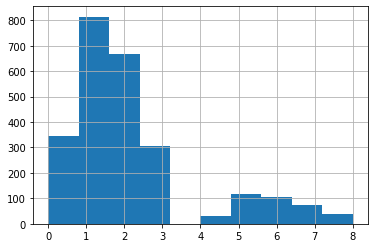

In [287]:
CCE20_['sentiment'].hist()

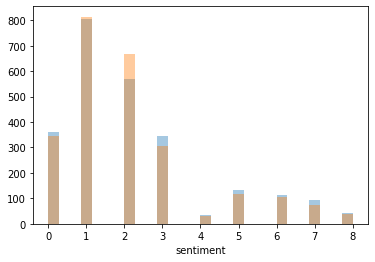

In [288]:
#calculate distributions for 2500 rows
sns.distplot(CCE_.sentiment, kde=False)
sns.distplot(CCE20_.sentiment, kde=False)

In [289]:
from statsmodels.stats import weightstats as stests

In [291]:
#ztest ,pval1 = stests.ztest(CCE_.sentiment, x2=CCE20_.sentiment, value=0,alternative='two-sided')
#print(float(pval1))
#if pval1<0.05:
#    print("reject null hypothesis")
#else:
#    print("accept null hypothesis")
stats.ttest_ind(CCE_.sentiment, CCE20_.sentiment) 

Ttest_indResult(statistic=1.7723201879756205, pvalue=0.07640230397781947)

In [292]:

stats.ttest_ind(CCE.sentiment, CCE20.sentiment)   


Ttest_indResult(statistic=1.0657111971070683, pvalue=0.28656448593199585)

In [293]:
RCE14 = pd.read_csv(r"C:\unnati\datascience\data\FY2014\structured\emotion\RaleighCityEmotionDataFY14.csv")
RCE14.drop(['Unnamed: 0'], axis=1,inplace=True)

In [294]:
RCE15 = pd.read_csv(r"C:\unnati\datascience\data\FY2015\structured\emotion\RaleighCityEmotionDataFY15.csv")
RCE15.drop(['Unnamed: 0'], axis=1,inplace=True)

In [295]:
RCE14.sentiment = RCE14.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [296]:
RCE15.sentiment = RCE15.sentiment.replace({"Negative": "0","Positive": "1","Trust" :"2","Sadness":"0","Anticipation":"3","Surprise":"4","Fear":"5","Joy":"6","Anger":"7","Disgust":"8"})

In [297]:
RCE14.sentiment = pd.to_numeric(RCE14['sentiment'])
RCE15.sentiment = pd.to_numeric(RCE15['sentiment'])

In [298]:
RCE14_ = RCE14.loc[:3000]
RCE14_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 5 columns):
page_number    3001 non-null int64
word           3001 non-null object
sent_count     3001 non-null int64
sentiment      3001 non-null int64
category       3001 non-null object
dtypes: int64(3), object(2)
memory usage: 117.3+ KB


In [299]:
RCE15_ = RCE15.loc[:3000]
RCE15_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 5 columns):
page_number    3001 non-null int64
word           3001 non-null object
sent_count     3001 non-null int64
sentiment      3001 non-null int64
category       3001 non-null object
dtypes: int64(3), object(2)
memory usage: 117.3+ KB


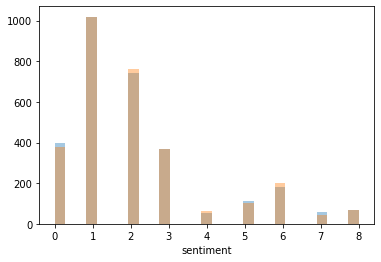

In [300]:
#calculate distributions for 2500 rows
sns.distplot(RCE14_.sentiment, kde=False)
sns.distplot(RCE15_.sentiment, kde=False)

In [301]:
print(RCE14_.mean())


page_number    105.630123
sent_count       3.251250
sentiment        2.144952
dtype: float64


In [302]:
print(RCE15_.mean())

page_number    98.399200
sent_count      3.143619
sentiment       2.153949
dtype: float64


H0 -> The sentiments remain same for consecutive years.
H1 -> The sentiments does not remain same for consecutive years.
To prove this Hypothesis two sample is performed and p-value threshold is p = 0.05

In [303]:
#two sample test for two years of raleigh document on 3000 words each
stats.ttest_ind(RCE14_.sentiment, RCE15_.sentiment)

Ttest_indResult(statistic=-0.18305159908730417, pvalue=0.8547637171990914)

As the p-value is much greater than threshold, we fail to reject Null Hypothesis

In [304]:
#two sample test for two years of whole document for Raleigh City
stats.ttest_ind(RCE14.sentiment, RCE15.sentiment)


Ttest_indResult(statistic=-0.01835602192889385, pvalue=0.985355048138511)

In [305]:
print(RCE14.mean())

page_number    107.911083
sent_count       1.763304
sentiment        2.223026
dtype: float64


In [306]:
print(RCE15.mean())

page_number    104.663456
sent_count       1.765014
sentiment        2.223570
dtype: float64
